In [1]:
import pandas as pd
import datetime as datetime
import pprint
import os
import psycopg2
import requests
import boto3
import dotenv
from requests import get 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlunparse
from bson.json_util import dumps
from IPython.display import display, Image
from IPython.display import HTML

# An example of getting current date

currDate = datetime.datetime.now()
 
print(currDate)

2023-06-16 20:59:38.251811


In [2]:
# Load the environment variables from the .env file
dotenv.load_dotenv()

scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)

POSTGRES_URL = os.environ.get('POSTGRES_URL')
# print(POSTGRES_URL)

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)


In [3]:
response = requests.get(scrape_url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

body_tag = soup.body

# print(body_tag)

In [4]:
img_tags = soup.find_all("img")
img_tags

[<img src="//eproof.drudgereport.com/pixel.gif" style="visibility: collapse;"/>,
 <img src="https://pbs.twimg.com/media/FyyW3YWakAEFw4v?format=png&amp;name=small" width="525"/>,
 <img border="0" height="85" src="/i/logo9.gif" width="610"/>,
 <img src="https://th.bing.com/th/id/OIP.bmhPpLAxFTXkoinWexDsqAHaLE" width="200"/>,
 <img src="https://th.bing.com/th/id/OIP.SpEgUte-c_j7O4wUaRSTdwAAAA" width="200"/>,
 <img src="https://pbs.twimg.com/media/Fyv71-uXoAANVDE?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/FyvsDF4WwAILsbO?format=jpg&amp;name=360x360" width="200"/>]

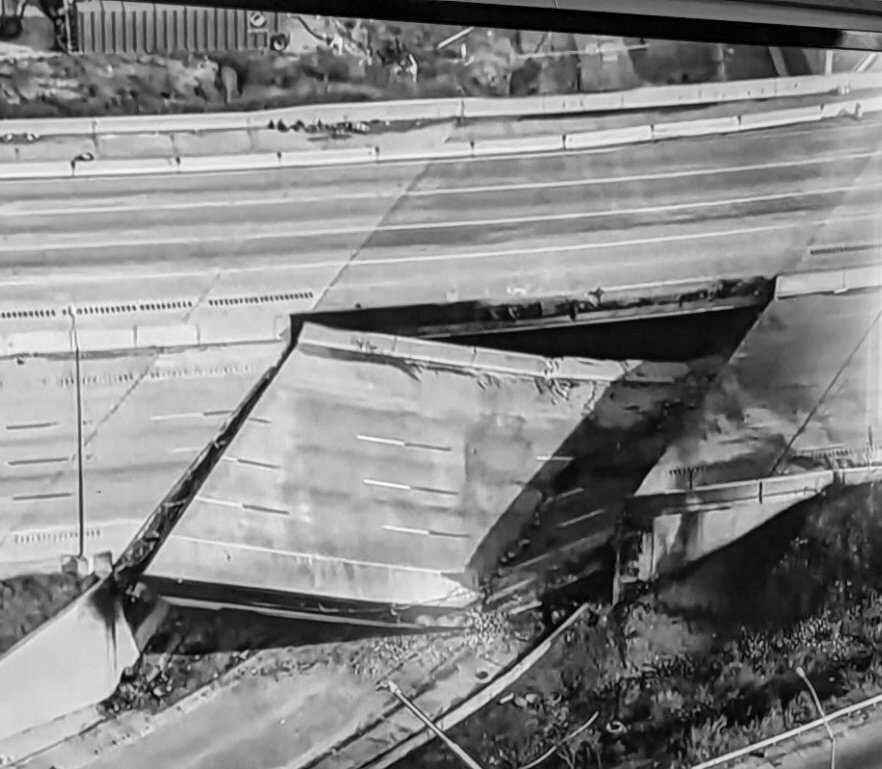

In [5]:
example_img = "https://pbs.twimg.com/media/FyV7PAEWwAADDKD.jpg"
# display(Image(example_img))
display(Image(example_img, width=200))


In [6]:
# webp file type

new_url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"
# display(Image(example_img))
from IPython.display import HTML, display

new_url_with_extension = new_url
print(new_url_with_extension)

# Generate HTML code to display the image with width set to 200 pixels
html_code = f'<img src="{new_url_with_extension}" width="200">'
print(html_code)

print("display the html image BEGIN")
display(HTML(html_code))
print("display the html image END")


https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG
<img src="https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG" width="200">
display the html image BEGIN


display the html image END


png
https://pbs.twimg.com/media/FyyW3YWakAEFw4v
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyyW3YWakAEFw4v', params='', query=None, fragment='')
{'format': ['png'], 'name': ['small']}
FyyW3YWakAEFw4v
https://pbs.twimg.com/media/FyyW3YWakAEFw4v.png


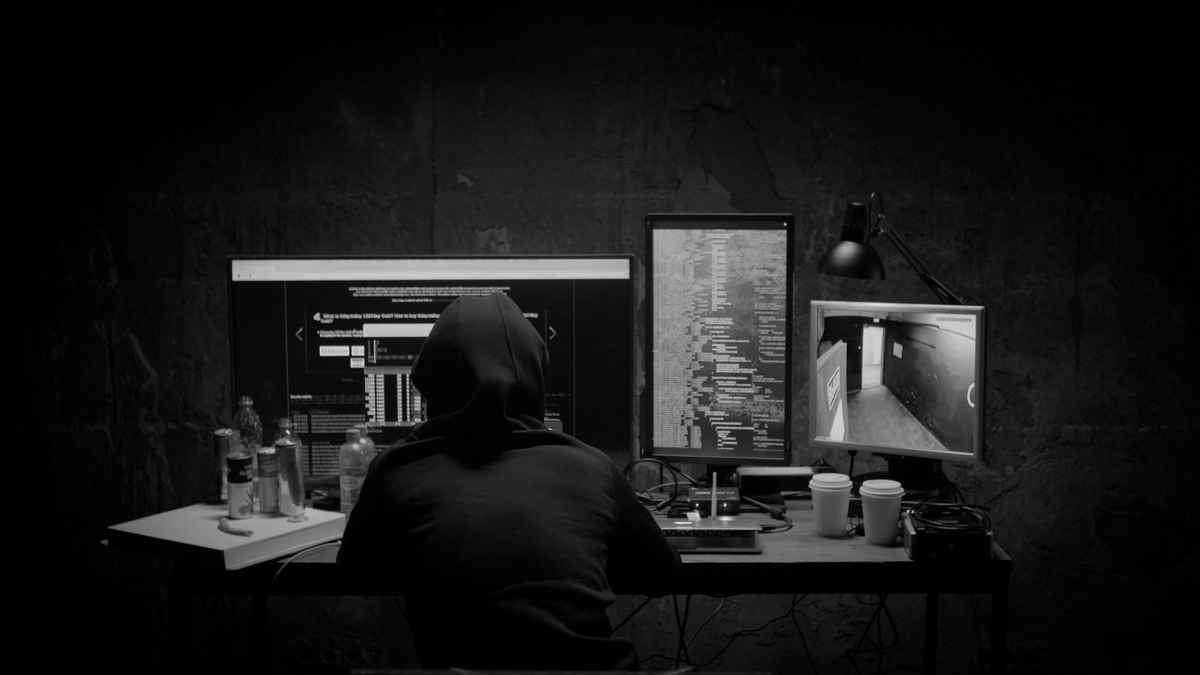

Content size of https://pbs.twimg.com/media/FyyW3YWakAEFw4v.png: 339810 bytes



https://th.bing.com/th/id/OIP.bmhPpLAxFTXkoinWexDsqAHaLE
ParseResult(scheme='https', netloc='th.bing.com', path='/th/id/OIP.bmhPpLAxFTXkoinWexDsqAHaLE', params='', query=None, fragment='')
{}
OIP.bmhPpLAxFTXkoinWexDsqAHaLE
The extension is empty, omitting extension.
https://th.bing.com/th/id/OIP.bmhPpLAxFTXkoinWexDsqAHaLE
Content size of https://th.bing.com/th/id/OIP.bmhPpLAxFTXkoinWexDsqAHaLE: 41493 bytes
<img src="https://th.bing.com/th/id/OIP.bmhPpLAxFTXkoinWexDsqAHaLE" width="200">
display the html image BEGIN


display the html image END



https://th.bing.com/th/id/OIP.SpEgUte-c_j7O4wUaRSTdwAAAA
ParseResult(scheme='https', netloc='th.bing.com', path='/th/id/OIP.SpEgUte-c_j7O4wUaRSTdwAAAA', params='', query=None, fragment='')
{}
OIP.SpEgUte-c_j7O4wUaRSTdwAAAA
The extension is empty, omitting extension.
https://th.bing.com/th/id/OIP.SpEgUte-c_j7O4wUaRSTdwAAAA
Content size of https://th.bing.com/th/id/OIP.SpEgUte-c_j7O4wUaRSTdwAAAA: 18065 bytes
<img src="https://th.bing.com/th/id/OIP.SpEgUte-c_j7O4wUaRSTdwAAAA" width="200">
display the html image BEGIN


display the html image END


jpg
https://pbs.twimg.com/media/Fyv71-uXoAANVDE
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/Fyv71-uXoAANVDE', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
Fyv71-uXoAANVDE
https://pbs.twimg.com/media/Fyv71-uXoAANVDE.jpg


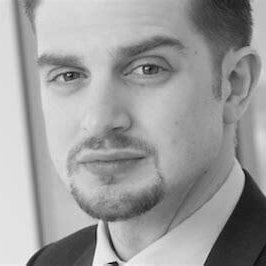

Content size of https://pbs.twimg.com/media/Fyv71-uXoAANVDE.jpg: 10783 bytes


jpg
https://pbs.twimg.com/media/FyvsDF4WwAILsbO
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FyvsDF4WwAILsbO', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
FyvsDF4WwAILsbO
https://pbs.twimg.com/media/FyvsDF4WwAILsbO.jpg


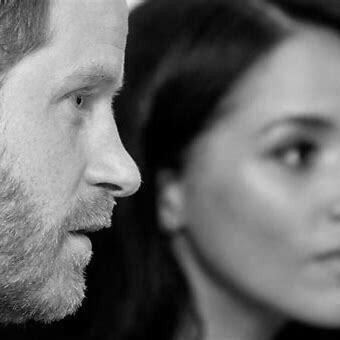

Content size of https://pbs.twimg.com/media/FyvsDF4WwAILsbO.jpg: 13584 bytes




In [7]:
# import os
# from urllib.parse import urlparse, parse_qs, urlunparse

for img in img_tags:
    src = img.get("src")
    if "https" in src:
        parsed_url = urlparse(src)
        query_params = parse_qs(parsed_url.query)
        extension = query_params.get('format', [''])[0]
        filename = os.path.basename(parsed_url.path)
        filename_with_extension = f"{filename}.{extension}"
        parsed_url = parsed_url._replace(query=None)
        new_url = urlunparse(parsed_url)

        print(extension)
        print(new_url)
        print(parsed_url)
        print(query_params)
        print(filename)
        # print(new_url_with_extension)

        if len(extension) > 0:
            # print("The extension is non-empty")
            new_url_with_extension = f"{new_url}.{extension}"
            print(new_url_with_extension)
            display(Image(new_url_with_extension, width=200))
            # file_size = os.path.getsize(new_url_with_extension)
            # print(file_size)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
        else:
            print("The extension is empty, omitting extension.")
            new_url_with_extension = new_url
            print(new_url_with_extension)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
            # Generate HTML code to display the image
            html_code = f'<img src="{new_url_with_extension}" width="200">'
            print(html_code)
            print("display the html image BEGIN")
            display(HTML(html_code))
            print("display the html image END")
    

        # display(Image(new_url_with_extension, width=200))
        print("\n")

        # print(extension)
        # print(new_url)
        # print(parsed_url)
        # print(query_params)
        # print(filename)
        # print(filename_with_extension)
        # display(Image(new_url + filename_with_extension.split('&')[0], width=200))


In [8]:
# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Iterate over the lines and print line number, content, and type (link or image)
for i, line in enumerate(lines, start=1):
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    if line.find("img"):
        line_type = "Image"

    print(f"Line {i}: {line_content} [{line_type}]")
    print(f"URL: {line_url}")

Line 1: DOJ asks judge to gag Trump over classified documents release... [Link]
URL: https://thehill.com/regulation/court-battles/4054194-justice-files-for-protective-order-to-prevent-trump-from-releasing-classified-materials/
Line 2: POLL:  56% believe he should end campaign... [Link]
URL: https://maristpoll.marist.edu/polls/the-trump-indictment/
Line 3: His promise of payback for prosecution follows years of attacking democratic traditions... [Link]
URL: https://apnews.com/article/trump-retribution-indictment-documents-biden-american-democracy-5a8ec37b359fee85d0f0956139d79f51
Line 4: RUSSIAN HACKERS DEMAND RANSOM FROM ENERGY DEPT [Link]
URL: https://news.yahoo.com/us-energy-dept-got-two-201406903.html
Line 5: GLOBAL CYBERATTACK [Link]
URL: https://www.cnn.com/2023/06/15/politics/us-government-hit-cybeattack/index.html
Line 6:  [Image]
URL: https://www.drudgereport.com
Line 7: Extreme weather targets... [Link]
URL: https://www.msn.com/en-us/weather/topstories/violent-storms-and-danger

In [30]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from datetime import datetime

# Make a request to the webpage
scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)
url = scrape_url  
response = requests.get(url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Connect to the PostgreSQL database
# conn = psycopg2.connect(
#     host="your_host",
#     database="your_database",
#     user="your_user",
#     password="your_password"
# )

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)

# Add 'sslmode=require' to the connection URL
# POSTGRES_URL += "?sslmode=require"

# print(POSTGRES_URL)

# Insert keyboard interrupt to stop the execution
# raise KeyboardInterrupt

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

# Initialize line_num as an integer
line_num = 0

current_datetime = datetime.now()

# Iterate over the lines and insert/update each line into the database
for line in lines:
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    # Increment line_num for each line
    line_num += 1

    if line.find("img"):
        line_type = "Image"
        line_content = line.get("src")
        print(f"Line {line_num}: Image found {line_content}")

    if bool(line_content):
        # Upsert the line into the database
        query = """
            INSERT INTO scraper_history (line_content, line_type, line_num, line_url, first_dt, latest_dt)
            VALUES (%s, %s, %s, %s, %s, %s)
            ON CONFLICT (line_content, line_url) DO UPDATE
            SET latest_dt = EXCLUDED.latest_dt
            WHERE scraper_history.line_content = EXCLUDED.line_content
            AND scraper_history.line_url = EXCLUDED.line_url
        """
        data = (line_content, line_type, line_num, line_url, current_datetime, current_datetime)
        cursor.execute(query, data)

# line_type = EXCLUDED.line_type,
# line_num = EXCLUDED.line_num,
# line_url = EXCLUDED.line_url,                
# ON CONFLICT (line_content, line_url) DO UPDATE
# WHERE scraper_history.latest_dt < EXCLUDED.latest_dt
            # WHERE scraper_history.id = EXCLUDED.id


# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()


Line 7: Image found None


### Store the image in an S3 bucket

In [ ]:
# import requests
# import boto3

# URL of the webp image
url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Access the image content
    image_content = response.content

    # Store the image content in an S3 bucket
    s3 = boto3.client('s3')
    bucket_name = 'your-bucket-name'
    key = 'image.webp'  # Provide a desired key (filename) with the .webp extension
    s3.put_object(Body=image_content, Bucket=bucket_name, Key=key)

    print("Image successfully stored in S3.")

else:
    print("Failed to retrieve the image:", response.status_code)


NoCredentialsError: Unable to locate credentials